In [ ]:
#A linear model in the presence of outliers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

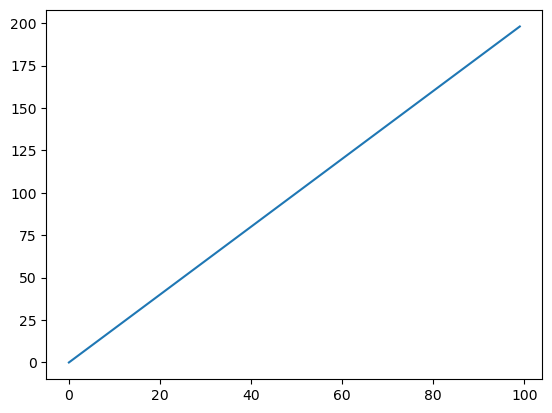

In [4]:
num_points = 100
x_vals = np.arange(num_points)
y_truth = 2 * x_vals
plt.plot(x_vals, y_truth)

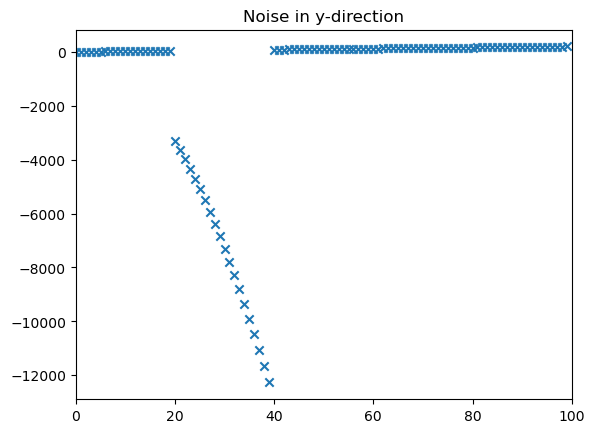

In [6]:
y_noisy = y_truth.copy()
#Change y-values of some points in the line
y_noisy[20:40] = y_noisy[20:40] * (-4 * x_vals[20:40]) - 100

plt.title("Noise in y-direction")
plt.xlim([0,100])
plt.scatter(x_vals, y_noisy,marker='x')

OLS  R-squared:  -904.756562183671 Mean Absolute Error 1480.9397011701167
TSR  R-squared:  0.9999999999265342 Mean Absolute Error 0.0004425033847393195


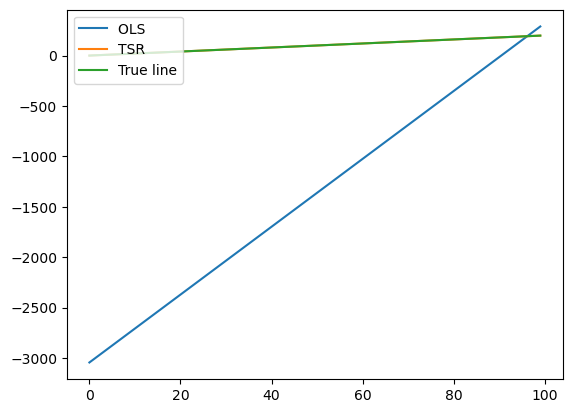

In [8]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.metrics import r2_score, mean_absolute_error

named_estimators = [('OLS ', LinearRegression()), ('TSR ', TheilSenRegressor())]

for num_index, est in enumerate(named_estimators):
    y_pred = est[1].fit(x_vals.reshape(-1, 1),y_noisy).predict(x_vals.reshape(-1, 1))
    print (est[0], "R-squared: ", r2_score(y_truth, y_pred), "Mean Absolute Error", mean_absolute_error(y_truth, y_pred))
    plt.plot(x_vals, y_pred, label=est[0])
plt.plot(x_vals, y_truth, label='True line')
plt.legend(loc='upper left')

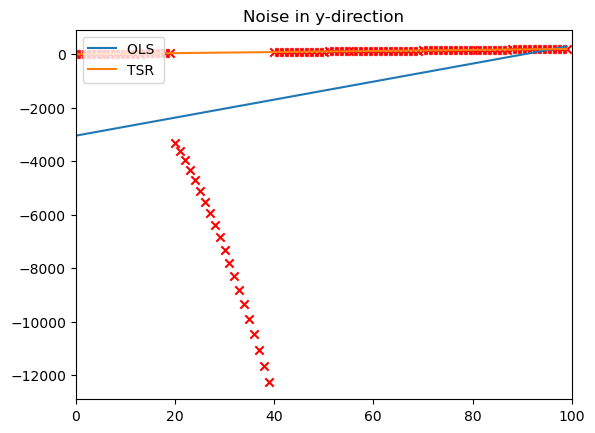

In [10]:
for num_index, est in enumerate(named_estimators):
    y_pred = est[1].fit(x_vals.reshape(-1, 1),y_noisy).predict(x_vals.reshape(-1, 1))
    plt.plot(x_vals, y_pred, label=est[0])
plt.legend(loc='upper left')
plt.title("Noise in y-direction")
plt.xlim([0,100])
plt.scatter(x_vals, y_noisy,marker='x', color='red')

In [12]:
from sklearn.linear_model import Ridge, LinearRegression, TheilSenRegressor, RANSACRegressor, ElasticNet, HuberRegressor
from sklearn.metrics import r2_score, mean_absolute_error
named_estimators = [('OLS ', LinearRegression()),('Ridge ', Ridge()),('TSR ', TheilSenRegressor()),('RANSAC', RANSACRegressor()),('ENet ',ElasticNet()),('Huber ',HuberRegressor())]
for num_index, est in enumerate(named_estimators):
    y_pred = est[1].fit(x_vals.reshape(-1, 1),y_noisy).predict(x_vals.reshape(-1, 1))
    print (est[0], "R-squared: ", r2_score(y_truth, y_pred), "Mean Absolute Error", mean_absolute_error(y_truth, y_pred))

OLS  R-squared:  -904.756562183671 Mean Absolute Error 1480.9397011701167
Ridge  R-squared:  -904.7501604538695 Mean Absolute Error 1480.9385250222022
TSR  R-squared:  0.9999999999265342 Mean Absolute Error 0.0004425033847393195
RANSAC R-squared:  1.0 Mean Absolute Error 1.0236256287043944e-14
ENet  R-squared:  -904.4272711687513 Mean Absolute Error 1480.8791832083955
Huber  R-squared:  0.9999999867470197 Mean Absolute Error 0.006644972126997656
